## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [7]:
import requests

try:
    response = requests.get(target_url)
    data = response.text
except:
    print('URL not available')
else:
    print('loading data sucessfully')
    
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

loading data sucessfully
784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [14]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'
data_split = data.split(split_tag)
print(len(data_split))
data_split[0]

# ## 由於這樣分割data_split串列的最後一個會為空，所以我們要將最後一個data拿掉
data_split = data_split[:-1]

## 由於這個被切割出來的字符串，還包含了前面的序號跟後面我們需要的url，所以我們要將它切割並分裝成兩個串列
number = []
url = []
for i in range(len(data_split)):
    ## 使用符號\t來分隔
    new_list = data_split[i].split('\t')
    print(new_list)
    # 將data分裝進對應的串列
    number.append(new_list[0])
    url.append(new_list[1])
## 這樣我們就有乾淨的url串列了


9996
['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg']
['n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg']
['n00015388_304', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg']
['n00015388_327', 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg']
['n00015388_355', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']
['n00015388_373', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg']
['n00015388_379', 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg']
['n00015388_388', 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg']
['n00015388_442', 'http://www.porschemania.it/discus/messages/815/102099.jpg']
['n00015388_474', 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg']
['n00015388_514', 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg']
['n00015388_671', 'http://farm4.

## 將 txt 轉成 pandas dataframe

In [15]:
import pandas as pd

data = {
    'number': number,
    'url': url
}
    
df = pd.DataFrame(data)
df.head()

,number,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

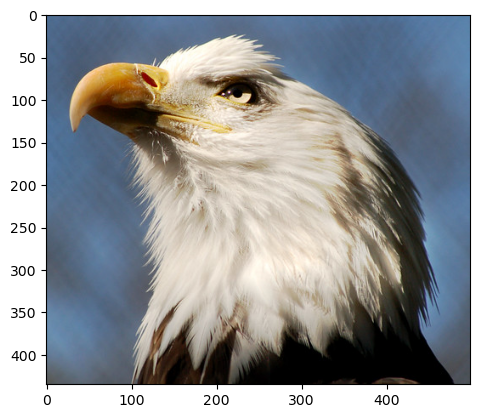

In [17]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 'url']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
img = np.array(img)
plt.imshow(img)
plt.show()

In [18]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    
    for url in url_list:
        response = requests.get(url)
        print(response)
        img = Image.open(BytesIO(response.content))
        print(img)
        ## 轉成NumPy array
        img_a = np.array(img)
        img_list.append(img_a)
        
    return img_list

<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x322 at 0x7FCD8DD24430>
<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x7FCD8D71B6A0>
<Response [200]>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7FCDAC6BB670>
<Response [404]>
Image unvailable
Total images that we got: 4 


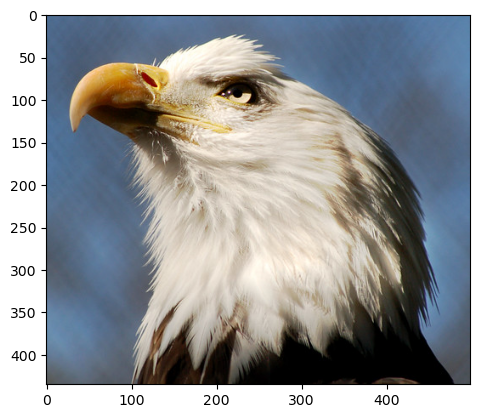

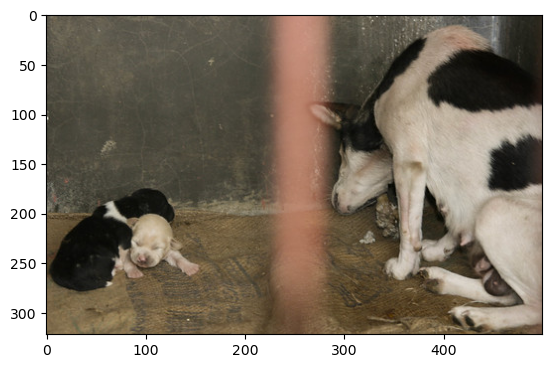

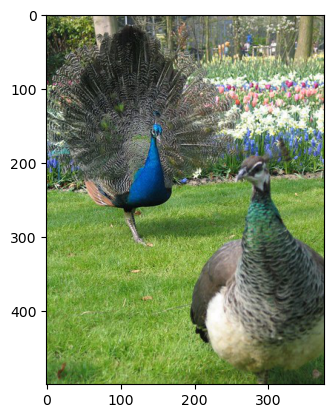

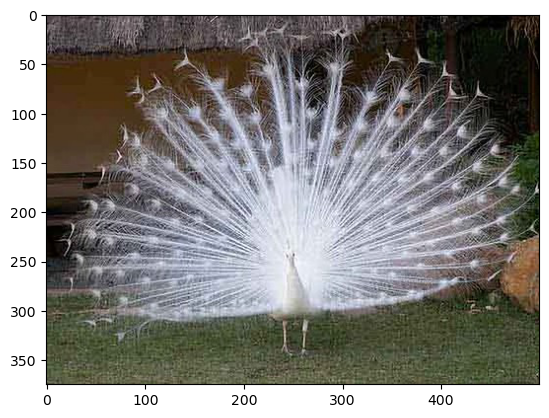

In [25]:
# 發現有Image失效了
# try: 
#     result = img2arr_fromURLs(df[0:5]['url'].values)
# except:
#     print('Image unvailable')

try: 
    result = img2arr_fromURLs(df[1:5]['url'].values)
except:
    print('Image unvailable')
else:
    print('All Image Available')
    
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉
for im_get in result:
    plt.imshow(im_get)
    plt.show()